In [80]:
#Importing Packages
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint
import sympy as sy
from scipy import optimize as opt

In [81]:
# ODE Definition Function
def ODE(FM, t, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z):
    P,P_b,P_u,E,E_b,E_u,S = FM
    dPdt = y - (k*S_e + (k/W)*S)*P + j*P_b + f*(A_e/A_p)*E
    dP_bdt = (k*S_e + (k/W)*S)*P - j*P_b - a*P_b
    dP_udt = a*P_b - g*(A_p/A_e)*P_u
    dEdt = b*E_u + j*E_b - (k/W)*S*E + g*(A_p/A_e)*P_u - f*(A_e/A_p)*E
    dE_bdt = (k/W)*S*E - j*E_b - a*E_b
    dE_udt = a*E_b - b*E_u - z*E_u
    dSdt = -(k/W)*S*((A_p/V)*P+(A_e/V)*E) + (j+a)*((A_p/V)*P_b+(A_e/V)*E_b) - (v_m*S)/(V*(K_m+S))
    dydt = [dPdt, dP_bdt, dP_udt, dEdt, dE_bdt, dE_udt, dSdt]
    return dydt

In [82]:
# Steady State Functions Creator Function
P, P_b, P_u, P_e, E, E_b, E_u, S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = sy.symbols("P, P_b, P_u, P_e, E, E_b, E_u, S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z")

P_e = P*e_i/e_o
# Steady State Functions Creator Function
def Steady_State_Functions():
    dPdt = y - (k*S_e + (k/W)*S)*P + j*P_b + f*(A_e/A_p)*E - e_i*P + e_o*P_e
    dP_bdt = (k*S_e + (k/W)*S)*P - j*P_b - a*P_b
    dP_udt = a*P_b - g*(A_p/A_e)*P_u
    dEdt = b*E_u + j*E_b - (k/W)*S*E + g*(A_p/A_e)*P_u - f*(A_e/A_p)*E
    dE_bdt = (k/W)*S*E - j*E_b - a*E_b
    dE_udt = a*E_b - b*E_u - z*E_u
    dSdt = -(k/W)*S*((A_p/V)*P+(A_e/V)*E) + (j+a)*((A_p/V)*P_b+(A_e/V)*E_b) - (v_m*S)/(V*(K_m+S))

    sol = sy.solvers.solve([dPdt, dP_bdt, dP_udt, dEdt, dE_bdt, dE_udt],[P, P_b, P_u, E, E_b, E_u])
    # sol = sy.solvers.solve([dPdt, dP_bdt, dP_udt, dP_edt, dEdt, dE_bdt, dE_udt, dSdt], [P, P_b, P_u, P_e, E, E_b, E_u, S])
    sol[P_e] = sol[P]*e_i/e_o
    return sol

sol = Steady_State_Functions()
print(sol.keys())
print("Solution with every parameter")
print('    P   = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[P])
print('    P_b = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[P_b])
print('    P_u = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[P_u])
print('    P_e = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[P_e])
print('    E   = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[E])
print('    E_b = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[E_b])
print('    E_u = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[E_u])
print()
print("Solution with only S as a parameter")
print('    P   = lambda S:', sol[P])
print('    P_b = lambda S:', sol[P_b])
print('    P_u = lambda S:', sol[P_u])
print('    P_e = lambda S:', sol[P_e])
print('    E   = lambda S:', sol[E])
print('    E_b = lambda S:', sol[E_b])
print('    E_u = lambda S:', sol[E_u])


dict_keys([E, E_b, E_u, P, P_b, P_u, P*e_i/e_o])
Solution with every parameter
    P   = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z: (A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*y + A_e*W**2*f*j**2*y*z + A_p*S*W*a**2*k*y*z + A_p*S*W*a*j*k*y*z)/(A_p*S**2*a**2*k**2*z + A_p*S*S_e*W*a**2*k**2*z)
    P_b = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z: (A_e*W*a*b*f*y + A_e*W*a*f*y*z + A_e*W*b*f*j*y + A_e*W*f*j*y*z + A_p*S*a*k*y*z)/(A_p*S*a**2*k*z)
    P_u = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z: (A_e**2*W*a*b*f*y + A_e**2*W*a*f*y*z + A_e**2*W*b*f*j*y + A_e**2*W*f*j*y*z + A_e*A_p*S*a*k*y*z)/(A_p**2*S*a*g*k*z)
    P_e = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z: e_i*(A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*

In [83]:
# Steady States Solution Function
def Steady_States(A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z, plotting=False):
    """Computes the steady states given parameters
    
    Parameters:
        The values of the parameters in our model
    
    Returns:
        steadies (tuple): The steady states of each state
    """
    # Defining the steady state functions in terms of S
    P   = lambda S: (A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*y + A_e*W**2*f*j**2*y*z + A_p*S*W*a**2*k*y*z + A_p*S*W*a*j*k*y*z)/(A_p*S**2*a**2*k**2*z + A_p*S*S_e*W*a**2*k**2*z)
    P_b = lambda S: (A_e*W*a*b*f*y + A_e*W*a*f*y*z + A_e*W*b*f*j*y + A_e*W*f*j*y*z + A_p*S*a*k*y*z)/(A_p*S*a**2*k*z)
    P_u = lambda S: (A_e**2*W*a*b*f*y + A_e**2*W*a*f*y*z + A_e**2*W*b*f*j*y + A_e**2*W*f*j*y*z + A_e*A_p*S*a*k*y*z)/(A_p**2*S*a*g*k*z)
    P_e = lambda S: e_i*(A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*y + A_e*W**2*f*j**2*y*z + A_p*S*W*a**2*k*y*z + A_p*S*W*a*j*k*y*z)/(e_o*(A_p*S**2*a**2*k**2*z + A_p*S*S_e*W*a**2*k**2*z))
    E   = lambda S: (W*a*b*y + W*a*y*z + W*b*j*y + W*j*y*z)/(S*a*k*z)
    E_b = lambda S: (b*y + y*z)/(a*z)
    E_u = lambda S: y/z
    
    # Define the dSdt function is terms of the other functions and S
    dSdt = lambda S: -(k/W)*S*((A_p/V)*P(S)+(A_e/V)*E(S)) + (j+a)*((A_p/V)*P_b(S)+(A_e/V)*E_b(S)) - (v_m*S)/(V*(K_m+S))
    # Find the steady state of S using bisection method (the S that makes dSdt=0)
    min_check = 1e-5
    max_check = 100
    S_steady = opt.bisect(dSdt, min_check, max_check)

    if plotting:
        S = np.linspace(min_check,max_check,100)
        dSdt_sample = dSdt(S)
        zero = np.zeros_like(S)
        plt.plot(S, dSdt_sample)
        plt.plot(S, zero)
        plt.show()
    
    # Calculate the steady states of the other states
    P_steady = P(S_steady)
    P_b_steady = P_b(S_steady)
    P_u_steady = P_u(S_steady)
    P_e_steady = P_e(S_steady)
    E_steady = E(S_steady)
    E_b_steady = E_b(S_steady)
    E_u_steady = E_u(S_steady)

    # Return the steady states
    return P_steady, P_b_steady, P_u_steady, P_e_steady, E_steady, E_b_steady, E_u_steady, S_steady

In [84]:
# ODE Solver
def Solve_ODE(ODE, y0, T, num, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z):
    t_span = np.linspace(0, T, num)
    sol = odeint(ODE, y0, t_span, args = (A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)).T
    sol_P = sol[0]
    sol_P_e = sol_P*e_i/e_o
    sol[0] = sol_P - sol_P_e
    sol_new = np.vstack([sol[:3], sol_P_e, sol[3:]]).T
    return t_span, sol_new

In [85]:
# Standard Parameters Function
def Parameters():
    # Define the parameters
    A_e = 47
    A_p = 314
    a = 1
    b = 1
    c = .15
    e_i = .3
    e_o = .3
    f = .1
    g = .1
    j = 1e2
    K_m = 2.5
    K_d = .74
    k = j/K_d
    S_e = .1
    y = .000083
    W = 32
    # v_m = 8.8e3
    # v_m = 8.8e8/60
    v_m = 88/6
    V = 523
    z = .002

    # Return the paramters
    return A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z

In [86]:
# Varying plotter function
def vary_plot(vary_domain, vary_param, P_steadies, P_b_steadies, P_u_steadies, P_e_steadies, E_steadies, E_b_steadies, E_u_steadies, S_steadies):
    # Transform into numpy arrays
    P_steadies = np.array(P_steadies)
    P_b_steadies = np.array(P_b_steadies)
    P_u_steadies = np.array(P_u_steadies)
    P_e_steadies = np.array(P_e_steadies)
    E_steadies = np.array(E_steadies)
    E_b_steadies = np.array(E_b_steadies)
    E_u_steadies = np.array(E_u_steadies)
    S_steadies = np.array(S_steadies)

    # Create arrays for total in each domain
    P_total = P_steadies + P_b_steadies + P_u_steadies + P_e_steadies
    E_total = E_steadies + E_b_steadies + E_u_steadies
    Total = P_total + E_total

    # Plot Combined Domains
    plt.plot(vary_domain, Total, "g", label="Total Steady")
    plt.plot(vary_domain, P_total, "b", label="PM Steady")
    plt.plot(vary_domain, E_total, "r", label="EM Steady")
    plt.xlabel(vary_param)
    plt.ylabel("Fur4")
    plt.title("Fur4 Steady States (Combined)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot Intracellular Uracil
    plt.plot(vary_domain, S_steadies, "k", label="Intracellular Uracil")
    plt.xlabel(vary_param)
    plt.ylabel("Intracellular Uracil ($S$)")
    plt.title("Intracellular Uracil Steady States")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot Individual domains
    plt.plot(vary_domain, P_steadies, "b", label="PM")
    plt.plot(vary_domain, P_b_steadies, "g", label="PM Bound")
    plt.plot(vary_domain, P_u_steadies, "r", label="PM Ubiq")
    plt.plot(vary_domain, P_e_steadies, "k", label="PM Eiso")
    plt.plot(vary_domain, E_steadies, "b--", label="EM")
    plt.plot(vary_domain, E_b_steadies, "g--", label="EM Bound")
    plt.plot(vary_domain, E_u_steadies, "r--", label="EM Ubiq")
    plt.xlabel(vary_param)
    plt.ylabel("Fur4")
    plt.title("Fur4 Steady States (Itemized)")
    plt.legend()
    plt.tight_layout()
    plt.show()






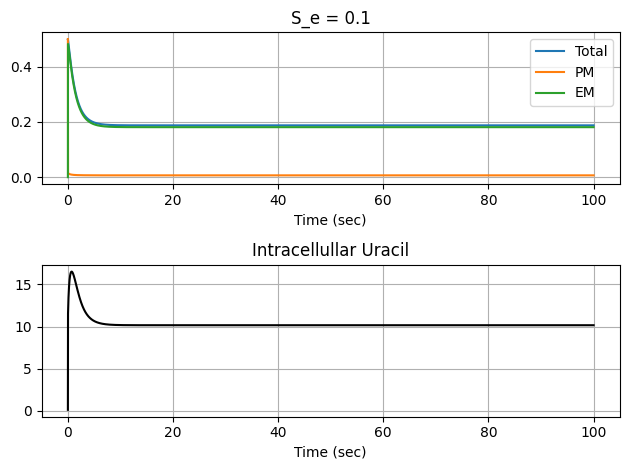

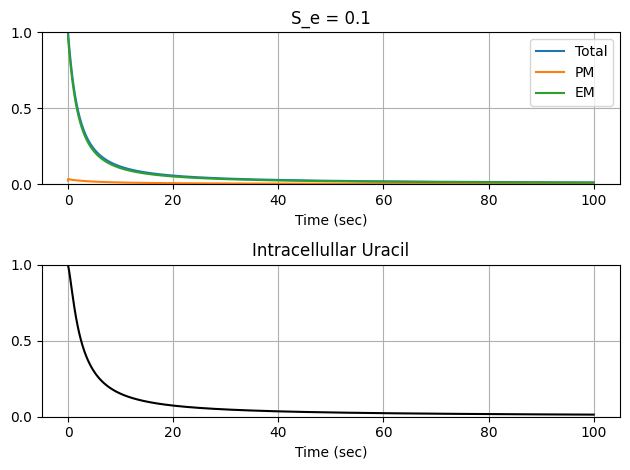

1.8025018025018027 sec


In [87]:
# Timecourse Experiments

#Define Initial Condition, Timespan, and rates to test
A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = Parameters()


S_e = 0.1
y0 = [0.5, 0, 0, 0, 0, 0, .1]

T = int(1e5)
num = 10*T
t = np.linspace(0, T, num)


#Defining subplot
plt1 = plt.subplot(int(f"211"))
#Finding solution to ODE
t, sol = Solve_ODE(ODE, y0, T, num, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)
# print(sol)
# #Plotting solution
# plt1.plot(t,sol[:,0],'b',label = "PM Ground State")
# plt1.plot(t,sol[:,1],'g',label = "PM Bound")
# plt1.plot(t,sol[:,2],'r',label = "PM Ubiquitinated")
# plt1.plot(t,sol[:,3],'k,',label = "Eisosome")
# plt1.plot(t,sol[:,4],'b--',label = "EM Ground State")
# plt1.plot(t,sol[:,5],'g--',label = "EM Bound")
# plt1.plot(t,sol[:,6],'r--',label = "EM Ubiquitinated")
# plt1.set_xlabel("Time")
# # plt.legend()
# plt.grid()
# plt1.set_title(f"S_e = {S_e}")
# plt2 = plt.subplot(int(f"212"))
# plt2.plot(t,sol[:,7],'k',label = "Intracellullar Uracil")
# plt2.set_xlabel("Time")
# plt2.set_title("Intracellullar Uracil")
# #Setting graph layout
# # plt.legend()
# plt.grid()
# plt1.set_xlabel("Time")
# print(sol[:,6][-1])


# plt.tight_layout()
# plt.show()


#Defining subplot
plt1 = plt.subplot(int(f"211"))
# print(sol)

PM = sol[:,0] + sol[:,1] + sol[:,2] + sol[:,3]
EM = sol[:,4] + sol[:,5] + sol[:,6]
#Plotting solution
plt1.plot(t/1e3,PM+EM,label = "Total")
plt1.plot(t/1e3,PM,label = "PM")
plt1.plot(t/1e3,EM,label = "EM")
plt1.set_xlabel("Time (sec)")
plt.legend()
# plt.legend()
plt.grid()
plt1.set_title(f"S_e = {S_e}")
plt2 = plt.subplot(int(f"212"))
plt2.plot(t/1e3,sol[:,7],'k',label = "Intracellullar Uracil")
plt2.set_xlabel("Time (sec)")
plt2.set_title("Intracellullar Uracil")
#Setting graph layout
# plt.legend()
plt.grid()
plt1.set_xlabel("Time (sec)")


plt.tight_layout()
plt.show()


y0 = np.concatenate([sol[-1,:3], sol[-1,4:]])
y = 0
t, sol = Solve_ODE(ODE, y0, T, num, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)


total_sol = np.sum(sol[:,:7], axis=1)
total_start = total_sol[0]
halflife_mask = total_sol <= total_start/2
halflife = t[halflife_mask][0]*1e-3


PM = np.sum(sol[:,:4], axis=1)/total_start
EM = np.sum(sol[:,4:7], axis=1)/total_start
#Plotting solution
plt1 = plt.subplot(int(f"211"))
plt1.plot(t/1e3,PM+EM,label = "Total")
plt1.plot(t/1e3,PM,label = "PM")
plt1.plot(t/1e3,EM,label = "EM")
plt1.set_xlabel("Time (sec)")
plt1.set_ylim(0, 1)
plt1.set_yticks([0, 0.5, 1])
plt.legend()
# plt.legend()
plt.grid()
plt1.set_title(f"S_e = {S_e}")
plt2 = plt.subplot(int(f"212"))
plt2.plot(t/1e3,sol[:,7]/sol[0,7],'k',label = "Intracellullar Uracil")
plt2.set_xlabel("Time (sec)")
plt2.set_title("Intracellullar Uracil")
plt2.set_ylim(0, 1)
plt2.set_yticks([0, 0.5, 1])
#Setting graph layout
# plt.legend()
plt.grid()
plt1.set_xlabel("Time (sec)")


plt.tight_layout()
plt.show()
print(halflife, "sec")


0.04149999999866872


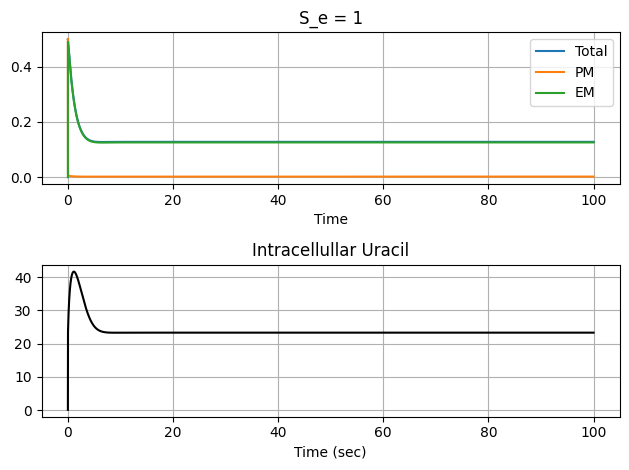

0.12756314877254651
6.904614058044188e-06


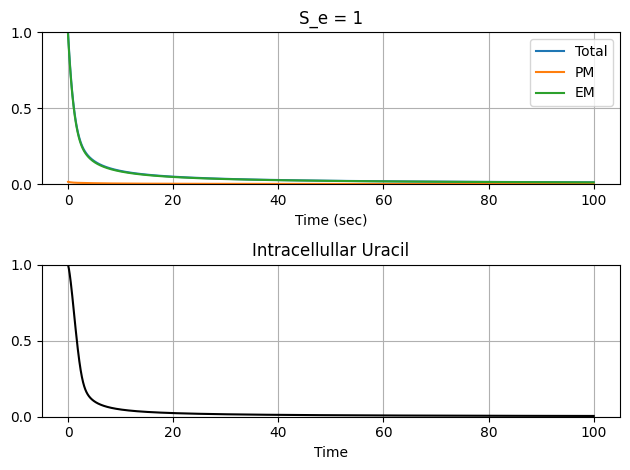

1.1278011278011277


In [88]:
# Timecourse Experiments

#Define Initial Condition, Timespan, and rates to test
A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = Parameters()


S_e = 1
y0 = [0.5, 0, 0, 0, 0, 0, .1]

T = int(1e5)
num = 10*T
t = np.linspace(0, T, num)


#Defining subplot
plt1 = plt.subplot(int(f"211"))
#Finding solution to ODE
t, sol = Solve_ODE(ODE, y0, T, num, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)
# print(sol)
# #Plotting solution
# plt1.plot(t,sol[:,0],'b',label = "PM Ground State")
# plt1.plot(t,sol[:,1],'g',label = "PM Bound")
# plt1.plot(t,sol[:,2],'r',label = "PM Ubiquitinated")
# plt1.plot(t,sol[:,3],'k,',label = "Eisosome")
# plt1.plot(t,sol[:,4],'b--',label = "EM Ground State")
# plt1.plot(t,sol[:,5],'g--',label = "EM Bound")
# plt1.plot(t,sol[:,6],'r--',label = "EM Ubiquitinated")
# plt1.set_xlabel("Time")
# # plt.legend()
# plt.grid()
# plt1.set_title(f"S_e = {S_e}")
# plt2 = plt.subplot(int(f"212"))
# plt2.plot(t,sol[:,7],'k',label = "Intracellullar Uracil")
# plt2.set_xlabel("Time")
# plt2.set_title("Intracellullar Uracil")
# #Setting graph layout
# # plt.legend()
# plt.grid()
# plt1.set_xlabel("Time")
# print(sol[:,6][-1])


# plt.tight_layout()
# plt.show()


#Defining subplot
plt1 = plt.subplot(int(f"211"))
# print(sol)

PM = sol[:,0] + sol[:,1] + sol[:,2] + sol[:,3]
EM = sol[:,4] + sol[:,5] + sol[:,6]
#Plotting solution
plt1.plot(t/1e3,PM+EM,label = "Total")
plt1.plot(t/1e3,PM,label = "PM")
plt1.plot(t/1e3,EM,label = "EM")
plt1.set_xlabel("Time (sec)")
plt.legend()
# plt.legend()
plt.grid()
plt1.set_title(f"S_e = {S_e}")
plt2 = plt.subplot(int(f"212"))
plt2.plot(t/1e3,sol[:,7],'k',label = "Intracellullar Uracil")
plt2.set_xlabel("Time (sec)")
plt2.set_title("Intracellullar Uracil")
#Setting graph layout
# plt.legend()
plt.grid()
plt1.set_xlabel("Time")
print(sol[:,6][-1])


plt.tight_layout()
plt.show()


y0 = np.concatenate([sol[-1,:3], sol[-1,4:]])
y = 0
t, sol = Solve_ODE(ODE, y0, T, num, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)


total_sol = np.sum(sol[:,:7], axis=1)
total_start = total_sol[0]
halflife_mask = total_sol <= total_start/2
halflife = (t/1e3)[halflife_mask][0]
print(total_start)


PM = np.sum(sol[:,:4], axis=1)/total_start
EM = np.sum(sol[:,4:7], axis=1)/total_start
#Plotting solution
plt1 = plt.subplot(int(f"211"))
plt1.plot(t/1e3,PM+EM,label = "Total")
plt1.plot(t/1e3,PM,label = "PM")
plt1.plot(t/1e3,EM,label = "EM")
plt1.set_xlabel("Time (sec)")
plt1.set_ylim(0, 1)
plt1.set_yticks([0, 0.5, 1])
plt.legend()
# plt.legend()
plt.grid()
plt1.set_title(f"S_e = {S_e}")
plt2 = plt.subplot(int(f"212"))
plt2.plot(t/1e3,sol[:,7]/sol[0,7],'k',label = "Intracellullar Uracil")
plt2.set_xlabel("Time")
plt2.set_title("Intracellullar Uracil")
plt2.set_ylim(0, 1)
plt2.set_yticks([0, 0.5, 1])
#Setting graph layout
# plt.legend()
plt.grid()
plt1.set_xlabel("Time (sec)")
print(sol[:,6][-1])


plt.tight_layout()
plt.show()
print(halflife)


0.04150000083580301


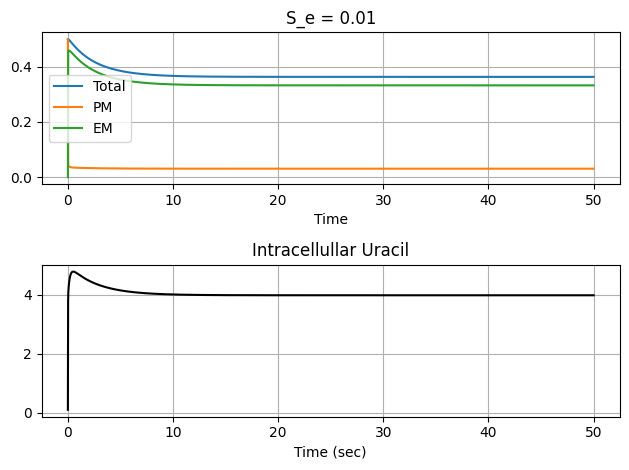

0.041500001007640286


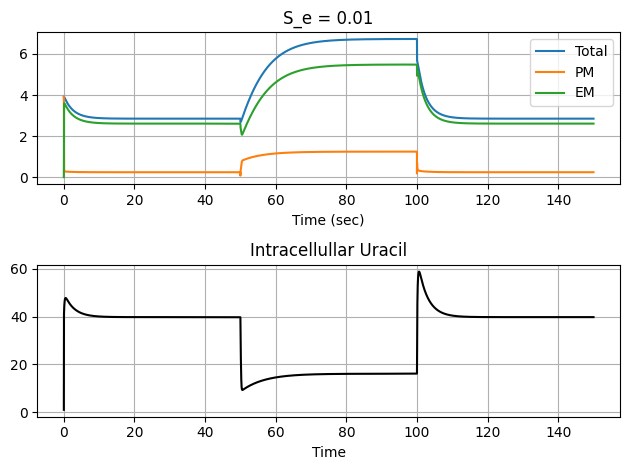

In [89]:
# Timecourse Experiments

#Define Initial Condition, Timespan, and rates to test
A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = Parameters()


S_e = 0.01
y0 = [0.5, 0, 0, 0, 0, 0, .1]

T = int(5e4)
num = 10*T
t = np.linspace(0, T, num)


#Defining subplot
plt1 = plt.subplot(int(f"211"))
#Finding solution to ODE
t, sol = Solve_ODE(ODE, y0, T, num, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)
# print(sol)
# #Plotting solution
# plt1.plot(t,sol[:,0],'b',label = "PM Ground State")
# plt1.plot(t,sol[:,1],'g',label = "PM Bound")
# plt1.plot(t,sol[:,2],'r',label = "PM Ubiquitinated")
# plt1.plot(t,sol[:,3],'k,',label = "Eisosome")
# plt1.plot(t,sol[:,4],'b--',label = "EM Ground State")
# plt1.plot(t,sol[:,5],'g--',label = "EM Bound")
# plt1.plot(t,sol[:,6],'r--',label = "EM Ubiquitinated")
# plt1.set_xlabel("Time")
# # plt.legend()
# plt.grid()
# plt1.set_title(f"S_e = {S_e}")
# plt2 = plt.subplot(int(f"212"))
# plt2.plot(t,sol[:,7],'k',label = "Intracellullar Uracil")
# plt2.set_xlabel("Time")
# plt2.set_title("Intracellullar Uracil")
# #Setting graph layout
# # plt.legend()
# plt.grid()
# plt1.set_xlabel("Time")
# print(sol[:,6][-1])


# plt.tight_layout()
# plt.show()


#Defining subplot
plt1 = plt.subplot(int(f"211"))
# print(sol)

PM = sol[:,0] + sol[:,1] + sol[:,2] + sol[:,3]
EM = sol[:,4] + sol[:,5] + sol[:,6]
#Plotting solution
plt1.plot(t/1e3,PM+EM,label = "Total")
plt1.plot(t/1e3,PM,label = "PM")
plt1.plot(t/1e3,EM,label = "EM")
plt1.set_xlabel("Time (sec)")
plt.legend()
# plt.legend()
plt.grid()
plt1.set_title(f"S_e = {S_e}")
plt2 = plt.subplot(int(f"212"))
plt2.plot(t/1e3,sol[:,7],'k',label = "Intracellullar Uracil")
plt2.set_xlabel("Time (sec)")
plt2.set_title("Intracellullar Uracil")
#Setting graph layout
# plt.legend()
plt.grid()
plt1.set_xlabel("Time")
print(sol[:,6][-1])


plt.tight_layout()
plt.show()


y0 = np.concatenate([sol[-1,:3], sol[-1,4:]])
S_e = 0.001
t2, sol2 = Solve_ODE(ODE, y0, T, num, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)

sol = np.vstack([sol, sol2])
t = np.concatenate([t, t2+t[-1]])

y0 = np.concatenate([sol[-1,:3], sol[-1,4:]])
S_e = 0.01
t2, sol2 = Solve_ODE(ODE, y0, T, num, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)

sol = np.vstack([sol, sol2])
t = np.concatenate([t, t2+t[-1]])


PM = np.sum(sol[:,:4], axis=1)/total_start
EM = np.sum(sol[:,4:7], axis=1)/total_start
#Plotting solution
plt1 = plt.subplot(int(f"211"))
plt1.plot(t/1e3,PM+EM,label = "Total")
plt1.plot(t/1e3,PM,label = "PM")
plt1.plot(t/1e3,EM,label = "EM")
plt1.set_xlabel("Time (sec)")
# plt1.set_ylim(top=10)
plt.legend()
# plt.legend()
plt.grid()
plt1.set_title(f"S_e = {S_e}")
plt2 = plt.subplot(int(f"212"))
plt2.plot(t/1e3,sol[:,7]/sol[0,7],'k',label = "Intracellullar Uracil")
plt2.set_xlabel("Time")
plt2.set_title("Intracellullar Uracil")
# plt2.set_ylim(top=10)
#Setting graph layout
# plt.legend()
plt.grid()
plt1.set_xlabel("Time (sec)")
print(sol[:,6][-1])


plt.tight_layout()
plt.show()


In [90]:

#Define Initial Condition, Timespan, and rates to test
A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = Parameters()

# Set 
S_e = 0.01

# Get the steady states for standard production rate
y0 = Steady_States(A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z, plotting=False)

y = 0
t, sol = Solve_ODE(ODE, y0, T, num, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)


total_sol = np.sum(sol[:,:7], axis=1)
total_start = total_sol[0]
halflife_mask = total_sol <= total_start/2
halflife = (t/1e3)[halflife_mask][0]
print(total_start)


PM = np.sum(sol[:,:4], axis=1)/total_start
EM = np.sum(sol[:,4:7], axis=1)/total_start
#Plotting solution
plt1 = plt.subplot(int(f"211"))
plt1.plot(t/1e3,PM+EM,label = "Total")
plt1.plot(t/1e3,PM,label = "PM")
plt1.plot(t/1e3,EM,label = "EM")
plt1.set_xlabel("Time (sec)")
plt1.set_ylim(0, 1)
plt1.set_yticks([0, 0.5, 1])
plt.legend()
# plt.legend()
plt.grid()
plt1.set_title(f"S_e = {S_e}")
plt2 = plt.subplot(int(f"212"))
plt2.plot(t/1e3,sol[:,7]/sol[0,7],'k',label = "Intracellullar Uracil")
plt2.set_xlabel("Time")
plt2.set_title("Intracellullar Uracil")
plt2.set_ylim(0, 1)
plt2.set_yticks([0, 0.5, 1])
#Setting graph layout
# plt.legend()
plt.grid()
plt1.set_xlabel("Time (sec)")
print(sol[:,6][-1])


plt.tight_layout()
plt.show()
print(halflife)


ValueError: too many values to unpack (expected 7)

In [ ]:
def half_life(S_e_new, T=int(1e5), num=int(1e6)):
    #Define Initial Condition, Timespan, and rates to test
    A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = Parameters()

    # Set 
    S_e = S_e_new

    # Get the steady states for standard production rate
    y0 = Steady_States(A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z, plotting=False)
    y0 = np.concatenate([y0[:3], y0[4:]])

    # Remove production rate and solve the ODE
    y = 0
    t, sol = Solve_ODE(ODE, y0, T, num, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)

    # Sum all the Fur4 states to get total Fur4 states solution
    total_sol = np.sum(sol[:,:7], axis=1)
    # Get the start value of the total solution
    total_start = total_sol[0]
    # Create a mask for the values that are <= half of the total start Fur4
    halflife_mask = total_sol <= total_start/2
    # Get the first time point that is <= half of the total start Fur4
    # This is the halflife
    halflife = (t/1e3)[halflife_mask][0]


    # Plot the progression of the decay of Fur4
    PM = np.sum(sol[:,:4], axis=1)/total_start
    EM = np.sum(sol[:,4:7], axis=1)/total_start
    #Plotting solution
    plt1 = plt.subplot(int(f"211"))
    plt1.plot(t/1e3,PM+EM,label = "Total")
    plt1.plot(t/1e3,PM,label = "PM")
    plt1.plot(t/1e3,EM,label = "EM")
    plt1.set_xlabel("Time (sec)")
    plt1.set_ylim(0, 1)
    plt1.set_yticks([0, 0.5, 1])
    plt.legend()
    # plt.legend()
    plt.grid()
    plt1.set_title(f"S_e = {S_e}")
    plt2 = plt.subplot(int(f"212"))
    plt2.plot(t/1e3,sol[:,7]/sol[0,7],'k',label = "Intracellullar Uracil")
    plt2.set_xlabel("Time (sec)")
    plt2.set_title("Intracellullar Uracil")
    plt2.set_ylim(0, 1)
    plt2.set_yticks([0, 0.5, 1])
    #Setting graph layout
    # plt.legend()
    plt.grid()
    plt1.set_xlabel("Time (sec)")

    # Print the halflife
    print(f"Half Life = {halflife:.4f} sec")
    print(f"Half Life = {halflife/60:.4f} min")
    print(f"Half Life = {halflife/60/60:.4f} hr")
    # Format and show the plot
    plt.tight_layout()
    plt.show()

Half Life = 4.8200 sec
Half Life = 0.0803 min
Half Life = 0.0013 hr


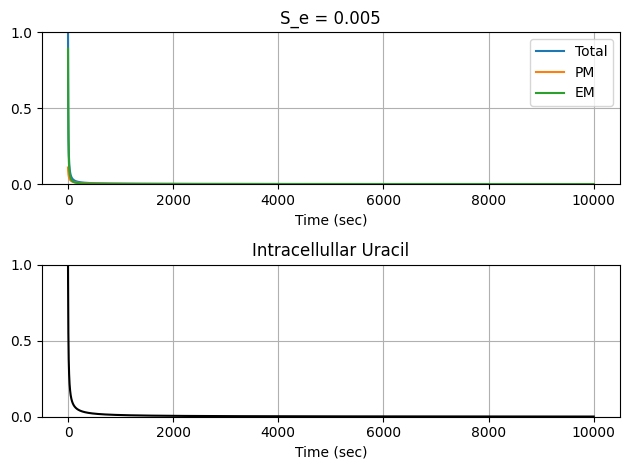

Half Life = 3.7300 sec
Half Life = 0.0622 min
Half Life = 0.0010 hr


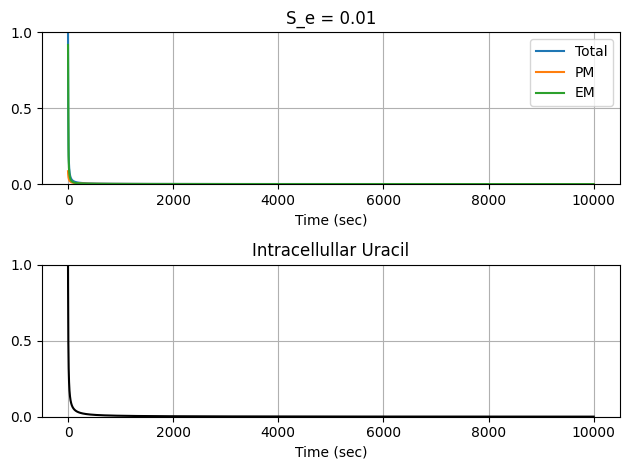

Half Life = 1.8000 sec
Half Life = 0.0300 min
Half Life = 0.0005 hr


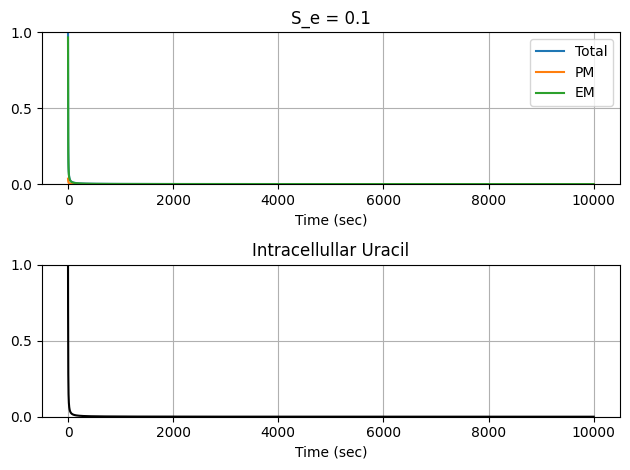

Half Life = 1.1300 sec
Half Life = 0.0188 min
Half Life = 0.0003 hr


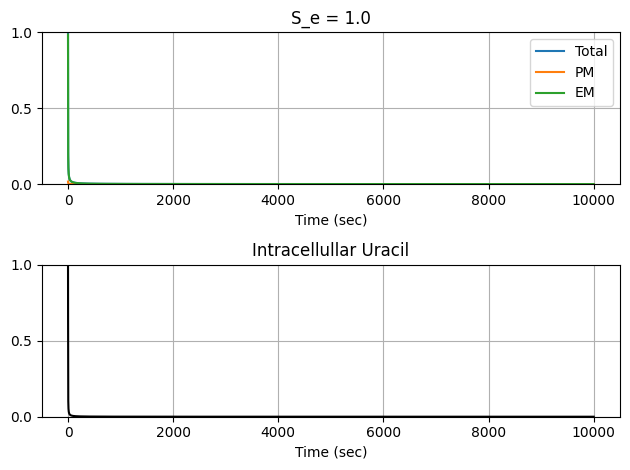

Half Life = 0.9600 sec
Half Life = 0.0160 min
Half Life = 0.0003 hr


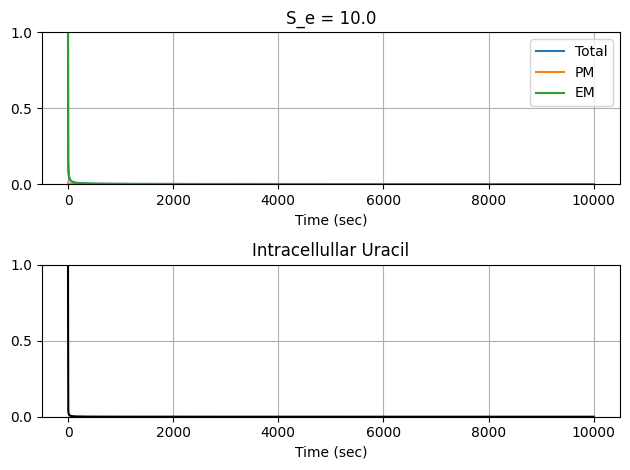

Half Life = 0.9300 sec
Half Life = 0.0155 min
Half Life = 0.0003 hr


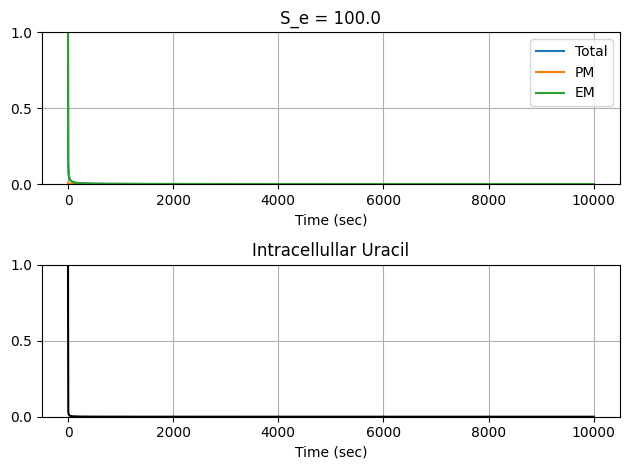

/usr/local/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Half Life = 0.9300 sec
Half Life = 0.0155 min
Half Life = 0.0003 hr


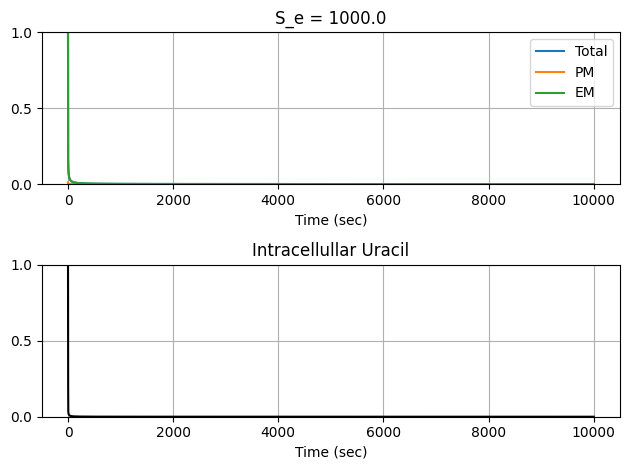

Half Life = 0.9200 sec
Half Life = 0.0153 min
Half Life = 0.0003 hr


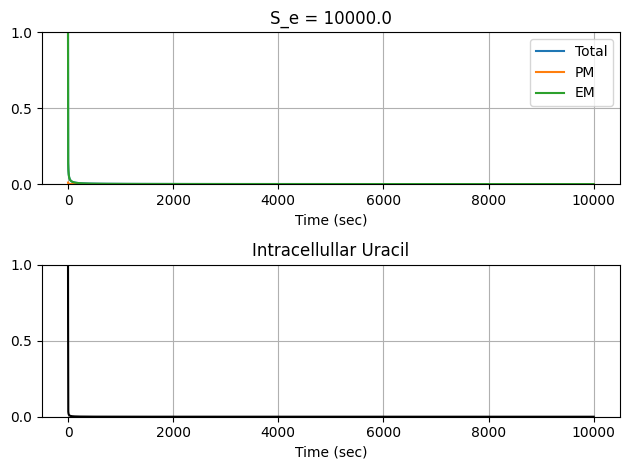

Half Life = 0.9200 sec
Half Life = 0.0153 min
Half Life = 0.0003 hr


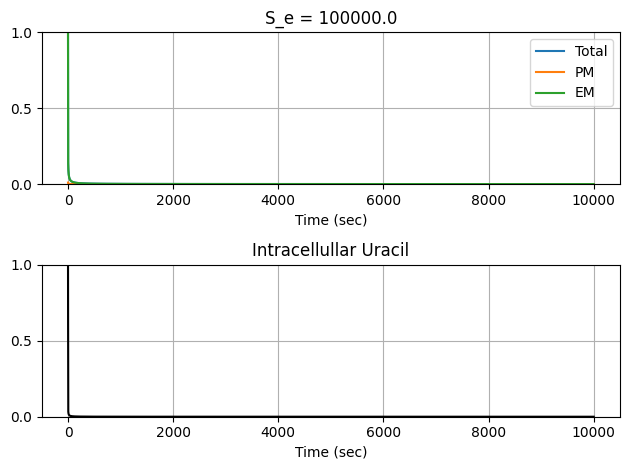

Half Life = 0.9200 sec
Half Life = 0.0153 min
Half Life = 0.0003 hr


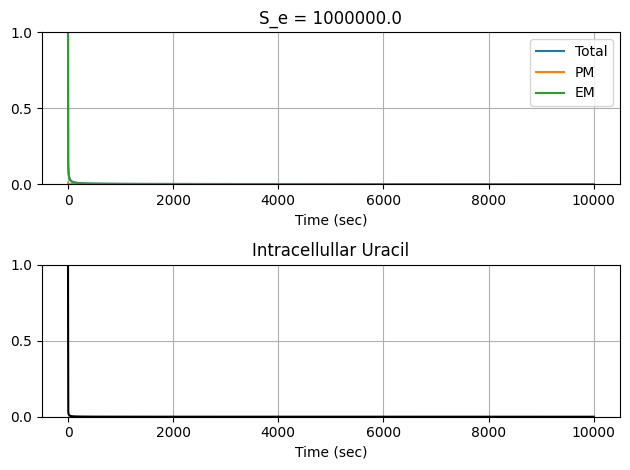

Half Life = 0.9200 sec
Half Life = 0.0153 min
Half Life = 0.0003 hr


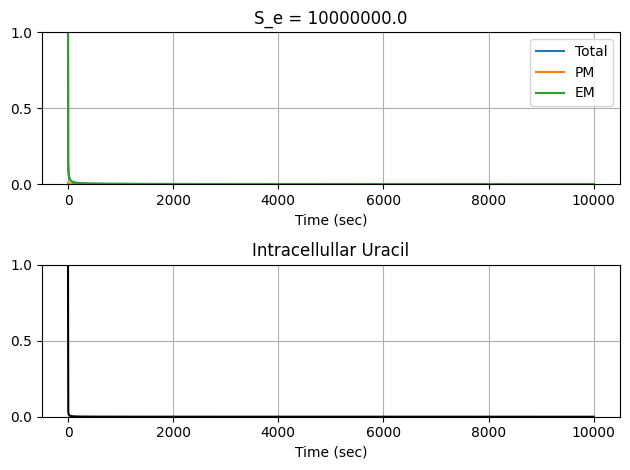

In [91]:
min_val = -2
max_val = 7
diff = max_val - min_val + 1
S_es = np.concatenate([[0.005], np.logspace(min_val, max_val, diff)])
for S_e in S_es:
    half_life(S_e, T=int(1e7))